# <span style="color:red">Monte Carlo Simulation</span>

#### v2.1.0

First choose the Monte Carlo Simulation type (fixed scope [1] / target date [2])
For fixed scope type 1 / For target date type 2, press ENTER: 2
Enter a target date in YYYY-MM-DD format: 2023-09-15
input number of intended MCS runs: 1000000
input work item Throughput (TP): 0.93


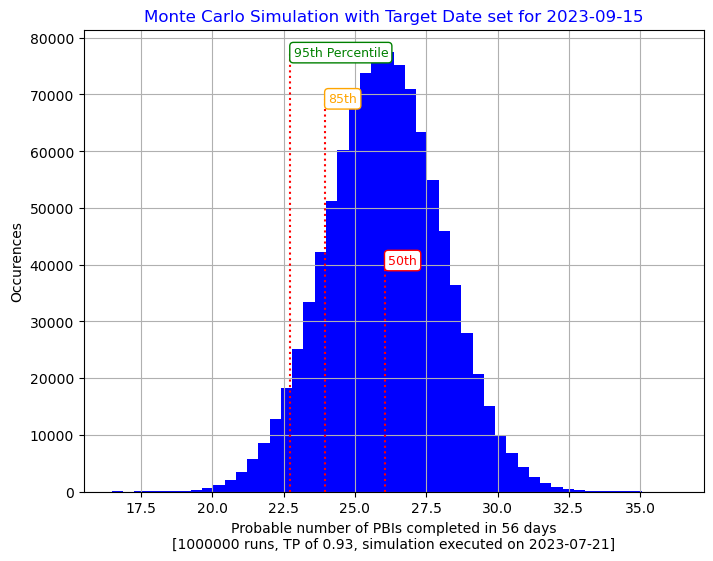

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import random
from typing import ItemsView
import re
import datetime as dt
from datetime import date, datetime, timedelta

%matplotlib inline

today = date.today()

# FIXED SCOPE FUNCTION
item_output_per_scope = np.array([], dtype="f")

def mcs_fixed_scope_func():
    item_output = np.array([], dtype="f")
    item_count = pbi_count
    loop_count = 0
    while item_count > 0:
        random_number = float(np.random.uniform(0, tp_float))
        #print(random_number, end=", ")
        item_count -= random_number
        loop_count += 1
    item_output = np.append(item_output, loop_count)
    return item_output

# TARGET DATE FUNCTION
item_output_per_time = np.array([], dtype="f")

def mcs_target_date_func():
    item_output = np.array([], dtype="f")
    days_count = 0
    items = 0.0
    loop_count = 0
    while days_count < days_left_count:
        random_number = float(np.random.uniform(0, tp_float))
        #print(random_number, end=", ")
        items = items + random_number
        days_count += 1
        #loop_count += 1
    item_output = np.append(item_output, items)
    return item_output

def add_days(n, d=datetime.today()):
    return d + timedelta(n)

def get_date_difference(today, enddate):
    diff = enddate - today
    return diff.days

x = "place_holder"

def plot_trigger1():
    global x
    x = "trigger1"
    
def plot_trigger2():
    global x
    x = "trigger2"
 
while True:
    selection_of_mcs_type = input("First choose the Monte Carlo Simulation type (fixed scope [1] / target date [2])\nFor fixed scope type 1 / For target date type 2, press ENTER: ")
    if selection_of_mcs_type == "1":
        pbi_count = float(input("Enter item count: "))
        pbi_count_plot = int(pbi_count) 
        intended_runs = int(input("Enter number of intended MCS runs: "))

        tp_float = float(input("Enter work item Throughput (TP) per day: ")) # select the teams work item throughput
        for i in range(intended_runs):
            i_o = mcs_fixed_scope_func()
            item_output_per_scope = np.append(item_output_per_scope, i_o)
        plot_trigger1()
        break
    elif selection_of_mcs_type == "2":
        date_entry = input("Enter a target date in YYYY-MM-DD format: ")
        year, month, day = map(int, date_entry.split("-"))
        enddate = dt.date(year, month, day)
        days_left_count = get_date_difference(today, enddate)
        intended_runs = int(input("input number of intended MCS runs: "))

        tp_float = float(input("input work item Throughput (TP): ")) # select the teams work item throughput
        for i in range(intended_runs):
            i_o = mcs_target_date_func()
            item_output_per_time = np.append(item_output_per_time, i_o)
        plot_trigger2()
        break
    else:
            print("You have to choose between scope and target date!")
            
#print(item_output_per_scope)
#print(item_output_per_time)

if x == "trigger1":
    mcs_fixed_scope = pd.Series(item_output_per_scope, name="Monte Carlo Simulation with Fixed Scope")
    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(mcs_fixed_scope, bins=50, alpha=1, color="blue")
    #mcs_series.plot(kind="kde")

    y_lim = ax.get_ylim()
    y = y_lim[1]
    y_lim, y

    quant_50, quant_85, quant_95 = mcs_fixed_scope.quantile(0.5), mcs_fixed_scope.quantile(0.85), mcs_fixed_scope.quantile(0.95)
    quant_50, quant_85, quant_95
    
    x_50 = quant_50 + (quant_50 * 0.005)
    x_85 = quant_85 + (quant_85 * 0.005)
    x_95 = quant_95 + (quant_95 * 0.005)
    y_50 = y - (y * 0.5)
    y_85 = y - (y * 0.15)
    y_95 = y - (y * 0.05)
        
    quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
    
    for i in quants:
        plt.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="red")

    q_50_date = add_days(quant_50, today)
    q_85_date = add_days(quant_85, today)
    q_95_date = add_days(quant_95, today)
    
    ax.text(x_50, y_50, f"50th ({q_50_date})", horizontalalignment="left", verticalalignment="center", size=9, alpha=1, color="red",
            bbox=dict(facecolor="white", edgecolor="red", boxstyle="round"))
    ax.text(x_85, y_85, f"85th ({q_85_date})", horizontalalignment="left", verticalalignment="center", size=9, alpha=1, color="orange",
            bbox=dict(facecolor="white", edgecolor="orange", boxstyle='round'))
    ax.text(x_95, y_95, f"95th Percentile ({q_95_date})",  horizontalalignment="left", verticalalignment="center",size=9, alpha=1, color="green",
            bbox=dict(facecolor="white", edgecolor="green", boxstyle="round"))


    ax.set(title=mcs_fixed_scope.name, xlabel=f"Days passing to complete {pbi_count_plot} PBIs\n[{intended_runs} runs, TP of {tp_float}, simulation executed on {today}]", ylabel="Occurences")
    ax.title.set_color("blue")
    ax.xaxis.label.set_color("black")
    ax.yaxis.label.set_color("black")
    plt.grid(True)
    plt.show()
    
elif x == "trigger2":
    mcs_target_date = pd.Series(item_output_per_time, name=f"Monte Carlo Simulation with Target Date set for {date_entry}")
    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(mcs_target_date, bins=50, alpha=1, color="blue")
    #mcs_series.plot(kind="kde")

    y_lim = ax.get_ylim()
    y = y_lim[1]
    y_lim, y

    quant_50, quant_85, quant_95 = mcs_target_date.quantile(0.5), mcs_target_date.quantile(0.15), mcs_target_date.quantile(0.05)
    quant_50, quant_85, quant_95
 
    x_50 = quant_50 + (quant_50 * 0.005)
    x_85 = quant_85 + (quant_85 * 0.005)
    x_95 = quant_95 + (quant_95 * 0.005)
    y_50 = y - (y * 0.5)
    y_85 = y - (y * 0.15)
    y_95 = y - (y * 0.05)

    quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
    
    for i in quants:
        plt.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="red")

    ax.text(x_50, y_50, "50th", horizontalalignment="left", verticalalignment="center", size=9, alpha=1, color="red",
            bbox=dict(facecolor="white", edgecolor="red", boxstyle="round"))
    ax.text(x_85, y_85, "85th", horizontalalignment="left", verticalalignment="center", size=9, alpha=1, color="orange",
            bbox=dict(facecolor="white", edgecolor="orange", boxstyle='round'))
    ax.text(x_95, y_95, "95th Percentile",  horizontalalignment="left", verticalalignment="center",size=9, alpha=1, color="green",
            bbox=dict(facecolor="white", edgecolor="green", boxstyle="round"))


    ax.set(title=mcs_target_date.name, xlabel=f"Probable number of PBIs completed in {days_left_count} days\n[{intended_runs} runs, TP of {tp_float}, simulation executed on {today}]", ylabel="Occurences")
    ax.title.set_color("blue")
    ax.xaxis.label.set_color("black")
    ax.yaxis.label.set_color("black")
    plt.grid(True)
    plt.show()